Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import Data

# Loading... Data

In [ ]:
# Copy of the main DataFrame
df = Data.DF.copy()

In [3]:
# Data informations
df.info()
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,yearly_salary_avg
381266,Data Engineer,Azure Data Engineer (hybrid),"Toronto, ON, Canada",via Central Illinois Proud Jobs,Full-time,False,Canada,2023-03-29 18:37:13,False,False,Canada,None,NaN,NaN,Cognizant Technology Solutions,"[python, sql, no-sql, azure, databricks]","{'cloud': ['azure', 'databricks'], 'programmin...",NaN
247532,Business Analyst,Operations Analyst,"Heredia Province, Heredia, Costa Rica",via BeBee Costa Rica,Full-time,False,Costa Rica,2023-06-17 07:36:41,False,False,Costa Rica,None,NaN,NaN,Moody's,"[vba, excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint'], 'pr...",NaN
121114,Data Analyst,Data Analyst,Singapore,via Indeed,Full-time,False,Singapore,2023-01-03 17:54:49,True,False,Singapore,None,NaN,NaN,INFOCEPTS PTE. LTD.,"[python, sql, mysql, postgresql, tableau]","{'analyst_tools': ['tableau'], 'databases': ['...",NaN


Cleaning Data

In [4]:
# Cleaning the date column
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

# Visualisations

What countries does the dataset depend on?

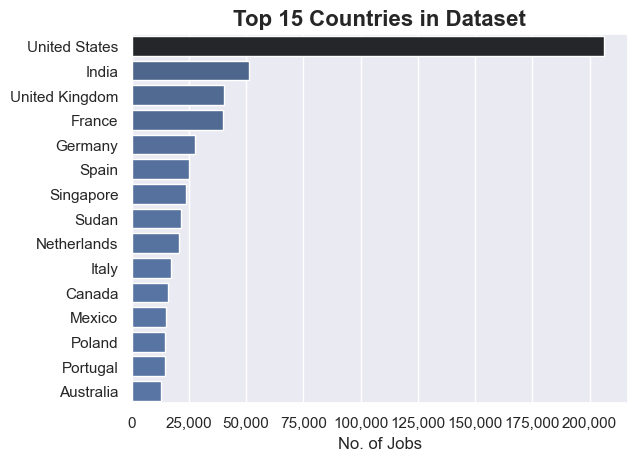

In [5]:
countries = df['job_country'].value_counts().nlargest(15).to_frame()

sns.set_theme()
sns.barplot(data=countries, x='count', y=countries.index, hue='count', legend=False, palette='dark:b_r')

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: format(int(x), ",")))

plt.title('Top 15 Countries in Dataset', fontweight='bold', size=16)
plt.ylabel('')
plt.xlabel('No. of Jobs')

plt.show()

What jobs does the dataset depend on?

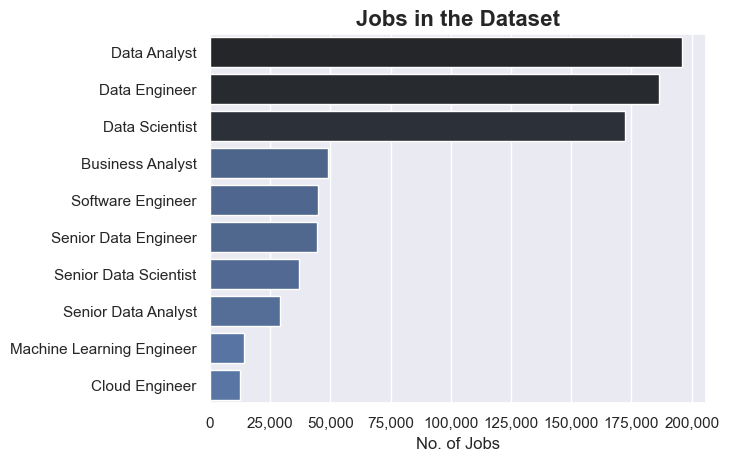

In [ ]:
jobs = df['job_title_short'].value_counts().to_frame()

sns.set_theme()
sns.barplot(data=jobs, x='count', y=jobs.index, hue='count', legend=False, palette='dark:b_r')

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: format(int(x), ",")))

plt.title('Jobs in the Dataset', fontweight='bold', size=16)
plt.ylabel('')
plt.xlabel('No. of Jobs')

plt.show()


What is the date of the dataset?

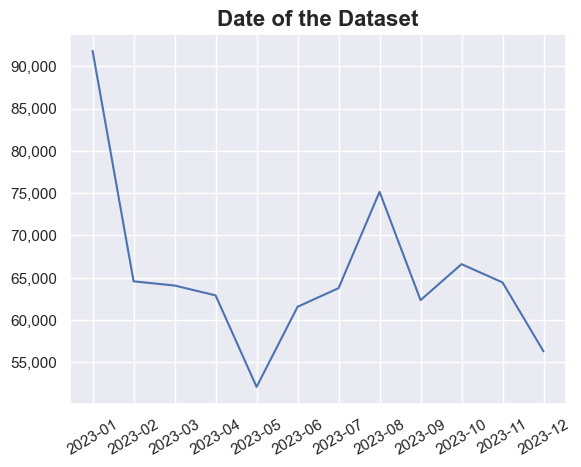

In [7]:
date = df['job_posted_date'].dt.strftime('%Y-%m').value_counts().to_frame()
date.reset_index(inplace=True)
date.sort_values(by='job_posted_date', inplace=True)

sns.set_theme()
sns.lineplot(data=date, x='job_posted_date', y='count')

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, pos: format(int(y), ",")))
plt.xticks(rotation=30)

plt.title('Date of the Dataset', fontweight='bold', size=16)
plt.ylabel('')
plt.xlabel('')

plt.show()

Yearly Salary VS Hourly Salary

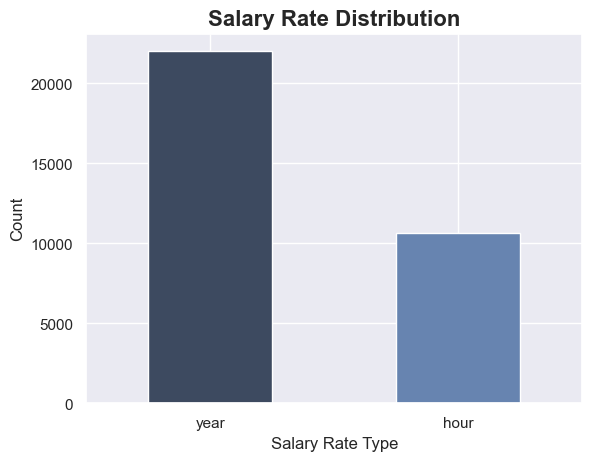

Note: 95.8% has no valid salary_rate


In [ ]:
salary_rate = df[(df['salary_rate'] == 'year') | (df['salary_rate'] == 'hour')]['salary_rate'].value_counts()

salary_rate.plot(
    kind='bar',
    color=["#3d4a60",'#6784b0']
)

plt.title('Salary Rate Distribution', fontweight='bold', size=16)
plt.xlabel('Salary Rate Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



total = len(df)
valid = df['salary_rate'].isin(['year', 'hour']).sum()
missing = total - valid

print(f"Note: {(missing / total) * 100:.1f}% has no valid salary rate")
